Questions about the dataset:
1. How has the total number of small firms and establishments changed over time? What does this reveal about the overall trend of small business growth in the US?
2. Which sectors show the highest new firm entry and exit rates over time?
3. How do new establishment entry rates and exit rates compare over time? What does this suggest about the ease of entering versus surviving in the market?
4. How does job creation from new firms compare to job destruction from firm deaths, and what does this balance reveal about the sustainability of small business employment?
5. How does the business reallocation rate reflect broader shifts in the US small business trend? Does it have anything to do with movement from traditional market to new digital operations?

In [10]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
s=pd.read_csv('Sector_Age_Size.csv')

In [14]:
id_cols=['year','sector','fage','fsize']
data_cols=[c for c in s.columns if c not in id_cols]
s.replace(['D','X', 'N'], pd.NA,  inplace=True)
s.dropna(subset=data_cols, how='all')

,year,sector,fage,fsize,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,...,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp
0,1978,11,a) 0,a) 1 to 4,2969,2969,8050,4025,2969,200.000,...,<NA>,<NA>,<NA>,<NA>,8050,200.000,<NA>,<NA>,<NA>,<NA>
1,1978,11,a) 0,b) 5 to 9,213,215,2780,1390,215,200.000,...,<NA>,<NA>,<NA>,<NA>,2780,200.000,<NA>,<NA>,<NA>,<NA>
2,1978,11,a) 0,c) 10 to 19,66,66,1786,893,66,200.000,...,<NA>,<NA>,<NA>,<NA>,1786,200.000,<NA>,<NA>,<NA>,<NA>
3,1978,11,a) 0,d) 20 to 99,32,32,2130,1065,32,200.000,...,<NA>,<NA>,<NA>,<NA>,2130,200.000,<NA>,<NA>,<NA>,<NA>
5,1978,11,a) 0,f) 500 to 999,0,0,0,0,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104875,2023,81,l) Left Censored,f) 500 to 999,276,2820,83597,81063,102,3.644,...,380,3135,0.469,4.336,5064,6.247,8.672,0,0,0
104876,2023,81,l) Left Censored,g) 1000 to 2499,225,3927,100553,97841,137,3.517,...,938,4073,0.959,5.122,5608,5.732,10.243,0,0,0
104877,2023,81,l) Left Censored,h) 2500 to 4999,118,1336,61084,58076,70,5.249,...,1086,2855,1.870,6.786,5644,9.718,13.572,0,0,0
104878,2023,81,l) Left Censored,i) 5000 to 9999,106,3641,86071,82953,408,11.650,...,775,2800,0.934,4.310,5681,6.848,8.619,0,0,0


In [15]:
firms_num=duckdb.sql("""SELECT year, SUM(CAST(firms AS DOUBLE)) AS total_firms
                            FROM s
                            WHERE year>=2000
                            GROUP BY year
                            ORDER BY year""").df()
print(firms_num)

    year  total_firms
0   2000    4981078.0
1   2001    4992018.0
2   2002    5018902.0
3   2003    5072006.0
4   2004    5160827.0
5   2005    5242673.0
6   2006    5337493.0
7   2007    5375178.0
8   2008    5310711.0
9   2009    5165537.0
10  2010    5093903.0
11  2011    5070530.0
12  2012    5117551.0
13  2013    5141822.0
14  2014    5177981.0
15  2015    5225684.0
16  2016    5291337.0
17  2017    5326629.0
18  2018    5356555.0
19  2019    5406194.0
20  2020    5410887.0
21  2021    5468780.0
22  2022    5619374.0
23  2023    5667880.0


In [17]:
entry_exit=duckdb.sql("""SELECT year, SUM(CAST(estabs_entry AS DOUBLE)) AS entry, SUM(CAST(estabs_exit AS DOUBLE)) AS exit
                            FROM s
                            WHERE year>=2000
                            GROUP BY year
                            ORDER BY year""").df()
entry_exit["net_entry"] = entry_exit["entry"] - entry_exit["exit"]
print(entry_exit)

    year     entry      exit  net_entry
0   2000  676440.0  626495.0    49945.0
1   2001  690079.0  659462.0    30617.0
2   2002  755668.0  715102.0    40566.0
3   2003  730983.0  663782.0    67201.0
4   2004  745170.0  641399.0   103771.0
5   2005  763729.0  659223.0   104506.0
6   2006  839136.0  678192.0   160944.0
7   2007  804827.0  725136.0    79691.0
8   2008  705539.0  748850.0   -43311.0
9   2009  627995.0  789940.0  -161945.0
10  2010  632043.0  704921.0   -72878.0
11  2011  655515.0  660742.0    -5227.0
12  2012  668064.0  622523.0    45541.0
13  2013  656608.0  617901.0    38707.0
14  2014  668767.0  599299.0    69468.0
15  2015  685917.0  603297.0    82620.0
16  2016  706396.0  583580.0   122816.0
17  2017  676507.0  638589.0    37918.0
18  2018  664076.0  629044.0    35032.0
19  2019  682658.0  607970.0    74688.0
20  2020  686571.0  665741.0    20830.0
21  2021  779532.0  727906.0    51626.0
22  2022  848160.0  695446.0   152714.0
23  2023  786086.0  696406.0    89680.0


In [18]:
firms_age=duckdb.sql("""SELECT fage, year, SUM(CAST(firms AS DOUBLE)) AS total_firms
                            FROM s
                            GROUP BY year, fage
                            ORDER BY year, fage""").df()
firms_age=firms_age.dropna(subset=['total_firms'])
firms_age=firms_age.reset_index(drop=True)
print(firms_age)

                 fage  year  total_firms
0                a) 0  1978     488891.0
1                b) 1  1978     357355.0
2    l) Left Censored  1978    2794314.0
3                a) 0  1979     473987.0
4                b) 1  1979     364531.0
..                ...   ...          ...
462       h) 11 to 15  2023     612189.0
463       i) 16 to 20  2023     525680.0
464       j) 21 to 25  2023     371143.0
465            k) 26+  2023     881523.0
466  l) Left Censored  2023     330240.0

[467 rows x 3 columns]


In [19]:
firms_job=duckdb.sql("""SELECT year, SUM(CAST(estabs_entry AS DOUBLE) - CAST(estabs_exit AS DOUBLE)) AS net_firm_entry, SUM(CAST(job_creation AS DOUBLE)-CAST(job_destruction AS DOUBLE)) AS net_jobs
                            FROM s
                            GROUP BY year
                            ORDER BY year""").df()
print(firms_job)

    year  net_firm_entry   net_jobs
0   1978       -319983.0  2640001.0
1   1979       -297330.0  1855839.0
2   1980       -352940.0 -1837849.0
3   1981       -368070.0 -1655321.0
4   1982       -421256.0 -2997160.0
5   1983       -349627.0 -3445531.0
6   1984       -331531.0  1968101.0
7   1985       -428428.0  -110821.0
8   1986       -372783.0  -497009.0
9   1987       -409749.0 -1746227.0
10  1988       -367257.0  -657924.0
11  1989       -394569.0  -109533.0
12  1990       -381517.0  -757752.0
13  1991       -411930.0 -4759120.0
14  1992       -414949.0 -2413376.0
15  1993       -391164.0  -929014.0
16  1994       -373335.0  -450948.0
17  1995       -360532.0   665562.0
18  1996       -371834.0  -990714.0
19  1997       -414550.0   -60807.0
20  1998       -345979.0   502731.0
21  1999       -368116.0  -456746.0
22  2000       -366853.0   873727.0
23  2001       -397601.0 -2260353.0
24  2002       -394792.0 -5747035.0
25  2003       -378133.0 -1916136.0
26  2004       -377989.0 -12

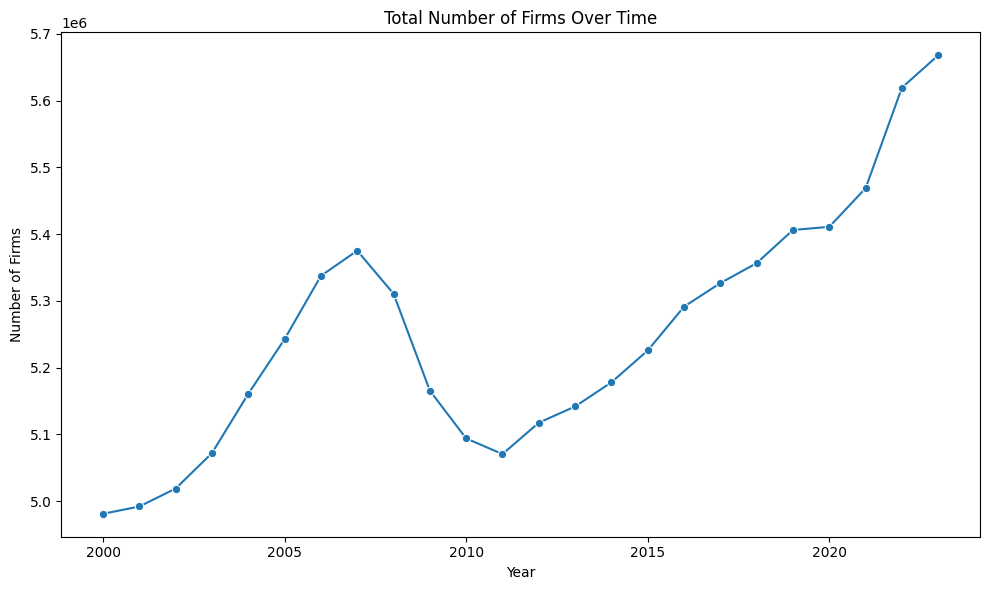

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(data=firms_num, x='year', y='total_firms', marker='o')
plt.title("Total Number of Firms Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Firms")
plt.tight_layout()
plt.show()

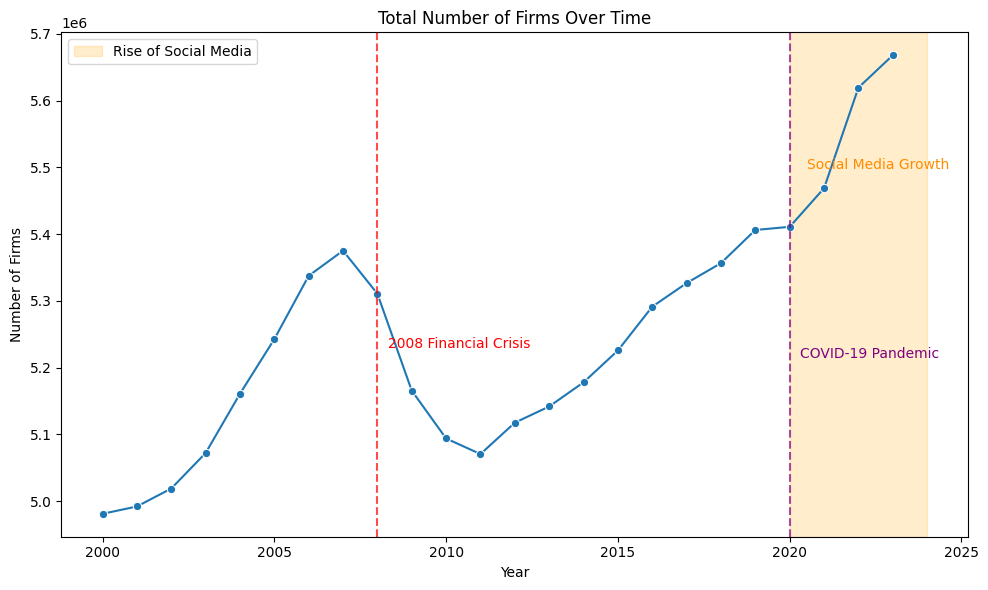

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(data=firms_num, x='year', y='total_firms', marker='o')

plt.title("Total Number of Firms Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Firms")

plt.axvline(x=2008, color='red', linestyle='--', alpha=0.7)
plt.text(2008.3, firms_num['total_firms'].min()*1.05, '2008 Financial Crisis', color='red')

plt.axvline(x=2020, color='purple', linestyle='--', alpha=0.7)
plt.text(2020.3, firms_num['total_firms'].max()*0.92, 'COVID-19 Pandemic', color='purple')

plt.axvspan(2020, 2024, color='orange', alpha=0.2, label='Rise of Social Media')
plt.text(2020.5, firms_num['total_firms'].max()*0.97, 'Social Media Growth', color='darkorange')

plt.legend()
plt.tight_layout()
plt.show()

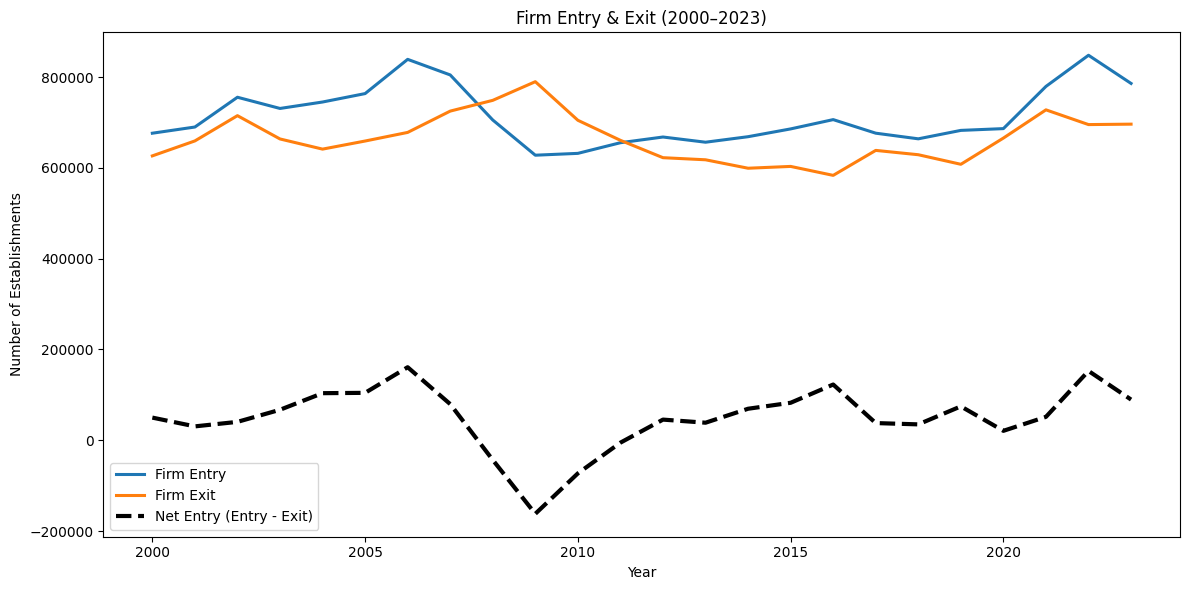

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data=entry_exit, x='year', y='entry', label='Firm Entry', linewidth=2.2)
sns.lineplot(data=entry_exit, x='year', y='exit', label='Firm Exit', linewidth=2.2)
sns.lineplot(data=entry_exit, x='year', y='net_entry', label='Net Entry (Entry - Exit)', linewidth=3, linestyle='--', color='black')
plt.title("Firm Entry & Exit (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Establishments")
plt.legend()
plt.tight_layout()
plt.show()

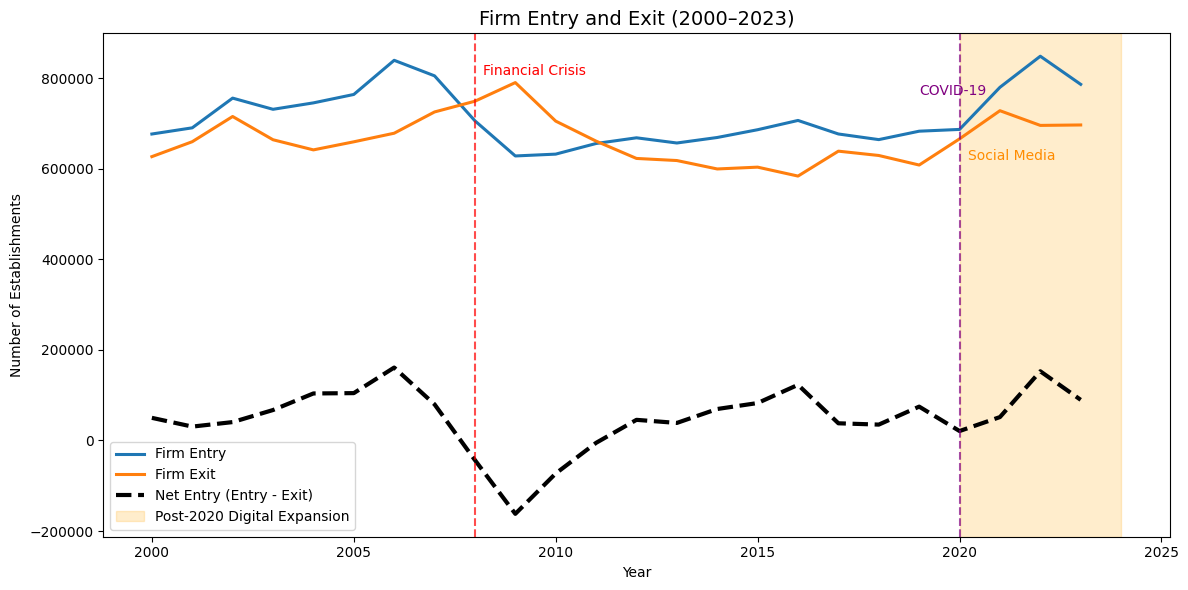

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.lineplot(data=entry_exit, x='year', y='entry', label='Firm Entry', linewidth=2.2)
sns.lineplot(data=entry_exit, x='year', y='exit', label='Firm Exit', linewidth=2.2)
sns.lineplot(data=entry_exit, x='year', y='net_entry', label='Net Entry (Entry - Exit)', 
             linewidth=3, linestyle='--', color='black')

plt.title("Firm Entry and Exit (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Establishments")

plt.axvline(x=2008, color='red', linestyle='--', alpha=0.7)
plt.text(2008.2, entry_exit['entry'].max()*0.95, 'Financial Crisis', color='red')

plt.axvline(x=2020, color='purple', linestyle='--', alpha=0.7)
plt.text(2019, entry_exit['entry'].max()*0.9, 'COVID-19', color='purple')

plt.axvspan(2020, 2024, color='orange', alpha=0.2, label='Post-2020 Digital Expansion')
plt.text(2020.2, entry_exit['entry'].max()*0.73, 'Social Media', 
         color='darkorange')

plt.legend()
plt.tight_layout()
plt.show()

The two graphs together provide context for how small business trends have evolved alongside the rise of social media and digital technology.
First graph: The total number of firms began to decline around 2007 and reached its lowest point around 2011, likely due to the Great Recession, which limited access to credit and reduced the financial capacity of entrepreneurs. The graph also shows a noticeable acceleration in firm growth after 2011, with an especially sharp increase after 2020. This coincides with the widespread adoption of platforms such as Facebook, Instagram, and TikTok for marketing, suggesting that social media has lowered barriers to visibility and market entry for smaller firms.
Second graph: The entry and exit trends reinforce this pattern. Firm exits spiked during the COVID-19 pandemic in 2020, but entries rebounded strongly afterward, leading to positive net entry post-2020. The sharp drop in net entry during 2006–2009 further reflects the financial crisis of that period. Together, these patterns highlight the broader shift toward online sales, digital outreach, and technology-driven entrepreneurship during and after the pandemic.